In [2]:
import numpy as np

from qiskit import QuantumCircuit, transpile

from qiskit_aer import QasmSimulator
from qiskit_aer.noise import NoiseModel, pauli_error

In [3]:
# parser = argparse.ArgumentParser()
# parser.add_argument('--trial',type= int, default=0)
# parser.add_argument('--shots',type= int)
# args = parser.parse_args()

p_reset = 0.1
p_meas = 0.1
p_gate1 = 0.1
p_phase = 0.1

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)
error_phase = pauli_error([('Z',p_phase), ('I', 1 - p_phase)])

# Add errors to noise model
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error_reset, "reset")
noise_model.add_all_qubit_quantum_error(error_meas, "measure")
noise_model.add_all_qubit_quantum_error(error_gate1.compose(error_phase), ["u1", "u2", "u3"])
noise_model.add_all_qubit_quantum_error(error_gate2.compose(error_phase.tensor(error_phase)), ["cx"])

Shots:  200
Result: Result(backend_name='qasm_simulator', backend_version='0.14.2', qobj_id='', job_id='736baf01-30ba-491a-bb38-8a3a09e3255b', success=True, results=[ExperimentResult(shots=200, success=True, meas_level=2, data=ExperimentResultData(counts={'0x2': 3, '0x0': 31, '0x3': 13, '0x1': 153}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='H2 STO-3G g1-g3', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=2512657240, metadata={'time_taken': 0.00304891, 'num_bind_params': 1, 'parallel_state_update': 16, 'parallel_shots': 1, 'required_memory_mb': 1, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'density_matrix', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.001273914, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 7640, 'noise': 'superop', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'applied

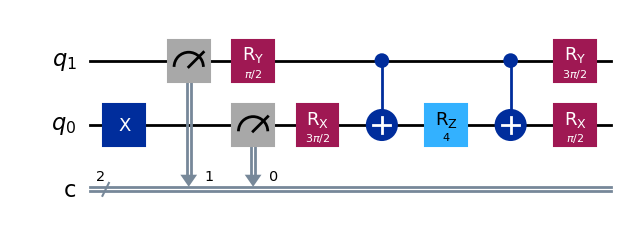

In [56]:

backend = QasmSimulator(method='density_matrix', noise_model=noise_model)

def simulator(theta, shots):
    
    print("Shots: ", shots)

    
    # Expectation value of <Z0>, <Z1>, <Z2>
    circuit = QuantumCircuit(2,2)
    circuit.name = 'H2 STO-3G g1-g3'
    circuit.x(0)
    circuit.measure(range(2), range(2))
    circuit.ry(np.pi/2,1)
    circuit.rx(3*np.pi/2,0)
    circuit.cx(1,0)
    circuit.rz(theta[0],0)
    circuit.cx(1,0)
    circuit.ry(3*np.pi/2,1)
    circuit.rx(np.pi/2,0)


    # Run Circuit
    transpiled_circuit = transpile(circuit, backend)
    job = backend.run(transpiled_circuit, shots=shots)
    result = job.result()
    counts = result.get_counts(circuit)
    print("Result:", result)
    print("Counts:", counts)


    for k in {'00', '01', '10', '11'}:
        if k not in counts.keys():
            counts[k] = 0
    sorted_counts = sorted(counts.items())
    output_distr = [ v[1] / shots for v in sorted_counts ]
    if (len(output_distr) == 1):
        output_distr.append(1-output_distr[0])
    print(output_distr)



    return circuit.draw('mpl', reverse_bits=True)

simulator([4], 200)

[0.2, 0.02, 0.1, 0.0]


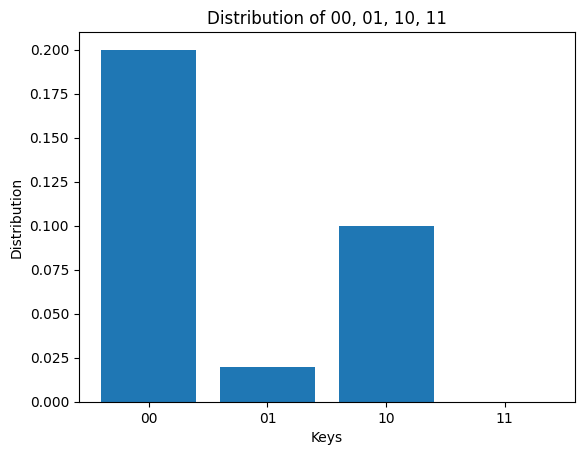

In [69]:
import matplotlib.pyplot as plt

# Example data
counts = {'00': 10, '01': 1, '10': 5}  # Example counts
shots = 50  # Total number of shots

# Ensure all possible keys are in the counts dictionary
for k in {'00', '01', '10', '11'}:
    if k not in counts.keys():
        counts[k] = 0

# Sort the counts by key
sorted_counts = sorted(counts.items())

# Calculate the distribution
output_distr = [v[1] / shots for v in sorted_counts]

# Ensure the distribution sums to 1 if there is only one key
if len(output_distr) == 1:
    output_distr.append(1 - output_distr[0])

# Print the distribution
print(output_distr)

# Plotting the bar chart
keys = [k for k, v in sorted_counts]
values = output_distr

plt.bar(keys, values)
plt.xlabel('Keys')
plt.ylabel('Distribution')
plt.title('Distribution of 00, 01, 10, 11')
plt.show()


In [25]:
def apply_simulation(func, data):
    results = []
    for item in data:
        results.append(func(item))
    return results

data = [1,2,3,4]
per_shots = 1000
record_history = True

simulation_results = apply_simulation(lambda x: simulator(x), data)

TypeError: 'int' object is not subscriptable